In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)


# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Plot style
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("./Dataset/phl_exoplanet_catalog_2019.csv")

print(df.shape)
df.head()


(4048, 112)


,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [3]:
df['P_HABITABLE'].value_counts()


P_HABITABLE
0    3993
2      34
1      21
Name: count, dtype: int64

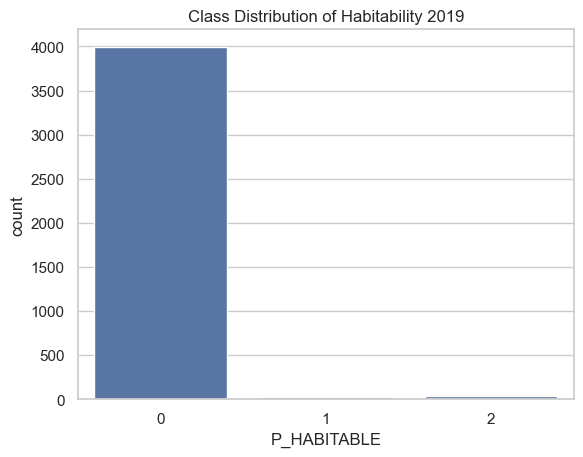

In [4]:
sns.countplot(x='P_HABITABLE', data=df)
plt.title("Class Distribution of Habitability 2019")
plt.show()


In [5]:
df.columns

Index(['P_NAME', 'P_STATUS', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX',
       'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR',
       'P_UPDATED',
       ...
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST'],
      dtype='object', length=112)

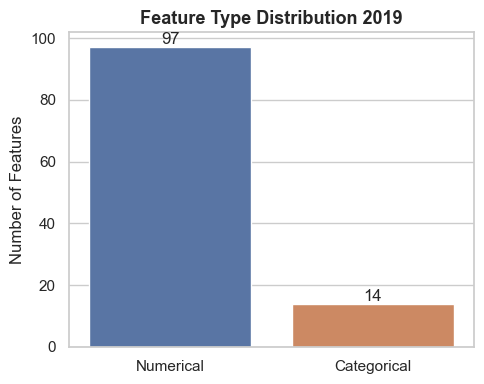

In [6]:
# Define target variable
target_col = "P_HABITABLE"
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

feature_df = pd.DataFrame({
    "Feature Type": ["Numerical"] * len(numerical_cols) +
                    ["Categorical"] * len(categorical_cols)
})

plt.figure(figsize=(5,4))
ax = sns.countplot(
    data=feature_df,
    x="Feature Type",
    palette=["#4C72B0", "#DD8452"]  # blue & orange
)

ax.set_title("Feature Type Distribution 2019", fontsize=13, weight="bold")
ax.set_ylabel("Number of Features")
ax.set_xlabel("")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")

plt.tight_layout()
plt.show()


In [7]:
print("Numerical Columns:")
for col in numerical_cols:
    print(col)

print("\nCategorical Columns:")
for col in categorical_cols:
    print(col)


Numerical Columns:
P_STATUS
P_MASS
P_MASS_ERROR_MIN
P_MASS_ERROR_MAX
P_RADIUS
P_RADIUS_ERROR_MIN
P_RADIUS_ERROR_MAX
P_YEAR
P_PERIOD
P_PERIOD_ERROR_MIN
P_PERIOD_ERROR_MAX
P_SEMI_MAJOR_AXIS
P_SEMI_MAJOR_AXIS_ERROR_MIN
P_SEMI_MAJOR_AXIS_ERROR_MAX
P_ECCENTRICITY
P_ECCENTRICITY_ERROR_MIN
P_ECCENTRICITY_ERROR_MAX
P_INCLINATION
P_INCLINATION_ERROR_MIN
P_INCLINATION_ERROR_MAX
P_OMEGA
P_OMEGA_ERROR_MIN
P_OMEGA_ERROR_MAX
P_TPERI
P_TPERI_ERROR_MIN
P_TPERI_ERROR_MAX
P_ANGULAR_DISTANCE
P_IMPACT_PARAMETER
P_IMPACT_PARAMETER_ERROR_MIN
P_IMPACT_PARAMETER_ERROR_MAX
P_TEMP_MEASURED
P_GEO_ALBEDO
P_GEO_ALBEDO_ERROR_MIN
P_GEO_ALBEDO_ERROR_MAX
P_DETECTION_MASS
P_DETECTION_RADIUS
P_ALT_NAMES
P_ATMOSPHERE
S_RA
S_DEC
S_MAG
S_DISTANCE
S_DISTANCE_ERROR_MIN
S_DISTANCE_ERROR_MAX
S_METALLICITY
S_METALLICITY_ERROR_MIN
S_METALLICITY_ERROR_MAX
S_MASS
S_MASS_ERROR_MIN
S_MASS_ERROR_MAX
S_RADIUS
S_RADIUS_ERROR_MIN
S_RADIUS_ERROR_MAX
S_AGE
S_AGE_ERROR_MIN
S_AGE_ERROR_MAX
S_TEMPERATURE
S_TEMPERATURE_ERROR_MIN
S_TEMPERATURE

In [8]:
cols_to_drop = [
    "P_NAME",
    "S_NAME",
    "P_ALT_NAMES",
    "S_ALT_NAMES",
    "S_RA_T",
    "S_DEC_T",
    "P_UPDATED",
]
df.shape

(4048, 112)

In [9]:
df = df.drop(columns=cols_to_drop)
df.shape

(4048, 105)

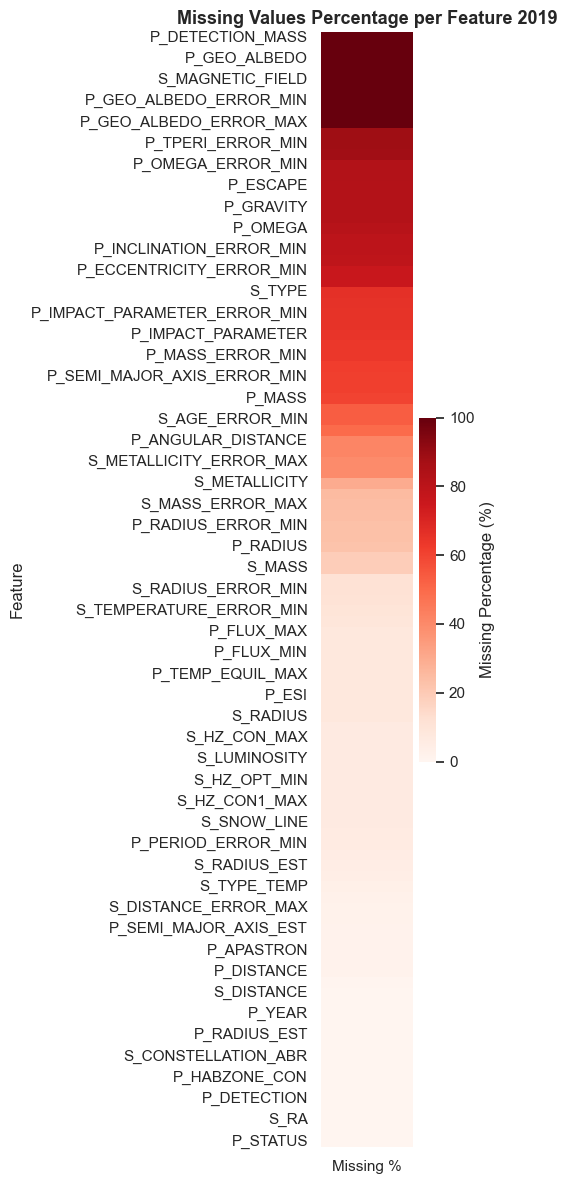

In [10]:
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)

# missing_pct is a Series: feature -> missing %
missing_pct_df = missing_pct.to_frame(name="Missing %")

plt.figure(figsize=(5,12))

ax = sns.heatmap(
    missing_pct_df,
    cmap="Reds",
    vmin=0,
    vmax=100,
    cbar=True,
    cbar_kws={
        "label": "Missing Percentage (%)",
        "shrink": 0.8
    }
)

ax.set_title("Missing Values Percentage per Feature 2019", fontsize=13, weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Feature")

plt.tight_layout()
plt.show()


In [11]:
cols_100_null = df.columns[df.isnull().all()].tolist()

print("Columns with 100% missing values and their null counts:\n")

for col in cols_100_null:
    print(f"{col}: {df[col].isnull().sum()} nulls")


Columns with 100% missing values and their null counts:

P_GEO_ALBEDO: 4048 nulls
P_DETECTION_MASS: 4048 nulls
P_DETECTION_RADIUS: 4048 nulls
P_ATMOSPHERE: 4048 nulls
S_DISC: 4048 nulls
S_MAGNETIC_FIELD: 4048 nulls


In [12]:
df = df.drop(columns=cols_100_null)
df.shape

(4048, 99)

In [13]:
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)

for col, pct in missing_pct.items():
    print(f"{col}: {pct:.2f}% missing")


P_GEO_ALBEDO_ERROR_MAX: 99.88% missing
P_GEO_ALBEDO_ERROR_MIN: 99.88% missing
P_TEMP_MEASURED: 99.88% missing
P_TPERI_ERROR_MAX: 88.34% missing
P_TPERI_ERROR_MIN: 88.34% missing
P_TPERI: 88.12% missing
P_OMEGA_ERROR_MAX: 82.88% missing
P_OMEGA_ERROR_MIN: 82.88% missing
P_ESCAPE: 82.56% missing
P_POTENTIAL: 82.56% missing
P_GRAVITY: 82.56% missing
P_DENSITY: 82.56% missing
P_OMEGA: 81.57% missing
P_INCLINATION_ERROR_MAX: 79.99% missing
P_INCLINATION_ERROR_MIN: 79.94% missing
P_INCLINATION: 79.15% missing
P_ECCENTRICITY_ERROR_MIN: 76.01% missing
P_ECCENTRICITY_ERROR_MAX: 76.01% missing
S_TYPE: 66.16% missing
P_ECCENTRICITY: 65.91% missing
P_IMPACT_PARAMETER_ERROR_MIN: 65.24% missing
P_IMPACT_PARAMETER_ERROR_MAX: 65.24% missing
P_IMPACT_PARAMETER: 65.19% missing
P_MASS_ERROR_MIN: 63.76% missing
P_MASS_ERROR_MAX: 63.76% missing
P_HILL_SPHERE: 61.81% missing
P_SEMI_MAJOR_AXIS_ERROR_MIN: 61.39% missing
P_SEMI_MAJOR_AXIS_ERROR_MAX: 61.36% missing
P_MASS: 60.52% missing
S_AGE_ERROR_MAX: 53.38%

In [14]:
#High missing values thinking of using different datasets

In [15]:
#This is PHL exoplanet catalog dataset upadted as of Jan 2024
hwc_df = pd.read_csv("./Dataset/hwc.csv")

In [16]:
hwc_df.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre


In [17]:
hwc_df.shape

(5599, 118)

In [18]:
for col, i in enumerate(hwc_df.columns, 1):
    print(f'{col}. {i}')

1. P_NAME
2. P_DETECTION
3. P_DISCOVERY_FACILITY
4. P_YEAR
5. P_UPDATE
6. P_MASS
7. P_MASS_ERROR_MIN
8. P_MASS_ERROR_MAX
9. P_MASS_LIMIT
10. P_MASS_ORIGIN
11. P_RADIUS
12. P_RADIUS_ERROR_MIN
13. P_RADIUS_ERROR_MAX
14. P_RADIUS_LIMIT
15. P_PERIOD
16. P_PERIOD_ERROR_MIN
17. P_PERIOD_ERROR_MAX
18. P_PERIOD_LIMIT
19. P_SEMI_MAJOR_AXIS
20. P_SEMI_MAJOR_AXIS_ERROR_MIN
21. P_SEMI_MAJOR_AXIS_ERROR_MAX
22. P_SEMI_MAJOR_AXIS_LIMIT
23. P_ECCENTRICITY
24. P_ECCENTRICITY_ERROR_MIN
25. P_ECCENTRICITY_ERROR_MAX
26. P_ECCENTRICITY_LIMIT
27. P_INCLINATION
28. P_INCLINATION_ERROR_MIN
29. P_INCLINATION_ERROR_MAX
30. P_INCLINATION_LIMIT
31. P_OMEGA
32. P_OMEGA_ERROR_MIN
33. P_OMEGA_ERROR_MAX
34. P_OMEGA_LIMIT
35. S_NAME
36. S_NAME_HD
37. S_NAME_HIP
38. S_TYPE
39. S_RA
40. S_DEC
41. S_RA_STR
42. S_DEC_STR
43. S_MAG
44. S_MAG_ERROR_MIN
45. S_MAG_ERROR_MAX
46. S_DISTANCE
47. S_DISTANCE_ERROR_MIN
48. S_DISTANCE_ERROR_MAX
49. S_TEMPERATURE
50. S_TEMPERATURE_ERROR_MIN
51. S_TEMPERATURE_ERROR_MAX
52. S_TEMPERATU

In [19]:
hwc_df['P_HABITABLE'].value_counts()

P_HABITABLE
0    5529
2      41
1      29
Name: count, dtype: int64

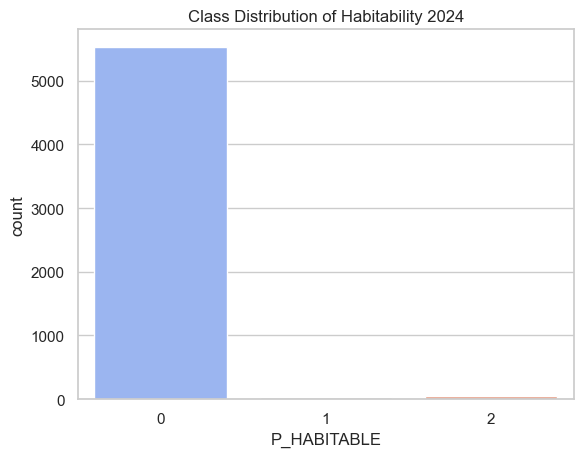

In [20]:
sns.countplot(x='P_HABITABLE', data=hwc_df, palette="coolwarm")
plt.title("Class Distribution of Habitability 2024")
plt.show()

In [21]:
before_df = (hwc_df.isnull().mean() * 100).sort_values(ascending=False)

for col, pct in before_df.items():
    print(f"{col}: {pct:.2f}% missing")

S_NAME_HD: 82.66% missing
S_NAME_HIP: 81.78% missing
P_OMEGA_ERROR_MAX: 72.76% missing
P_OMEGA_ERROR_MIN: 72.76% missing
P_ECCENTRICITY_ERROR_MIN: 71.16% missing
P_ECCENTRICITY_ERROR_MAX: 71.16% missing
P_OMEGA: 70.37% missing
P_INCLINATION_ERROR_MAX: 69.32% missing
P_INCLINATION_ERROR_MIN: 69.28% missing
S_TYPE: 63.90% missing
P_TEMP_SURF: 56.40% missing
P_MASS_ERROR_MIN: 55.24% missing
P_MASS_ERROR_MAX: 55.24% missing
P_SEMI_MAJOR_AXIS_ERROR_MIN: 51.83% missing
P_SEMI_MAJOR_AXIS_ERROR_MAX: 51.83% missing
S_LOG_LUM_ERROR_MIN: 42.85% missing
S_LOG_LUM_ERROR_MAX: 42.54% missing
P_RADIUS_ERROR_MIN: 31.29% missing
P_RADIUS_ERROR_MAX: 31.29% missing
S_AGE_ERROR_MAX: 26.04% missing
S_AGE_ERROR_MIN: 26.04% missing
P_INCLINATION: 23.41% missing
S_AGE: 21.56% missing
P_ECCENTRICITY: 13.88% missing
S_METALLICITY_ERROR_MIN: 13.18% missing
S_METALLICITY_ERROR_MAX: 13.18% missing
P_PERIOD_ERROR_MAX: 13.00% missing
P_PERIOD_ERROR_MIN: 13.00% missing
S_METALLICITY: 7.73% missing
S_TEMPERATURE_ERROR_

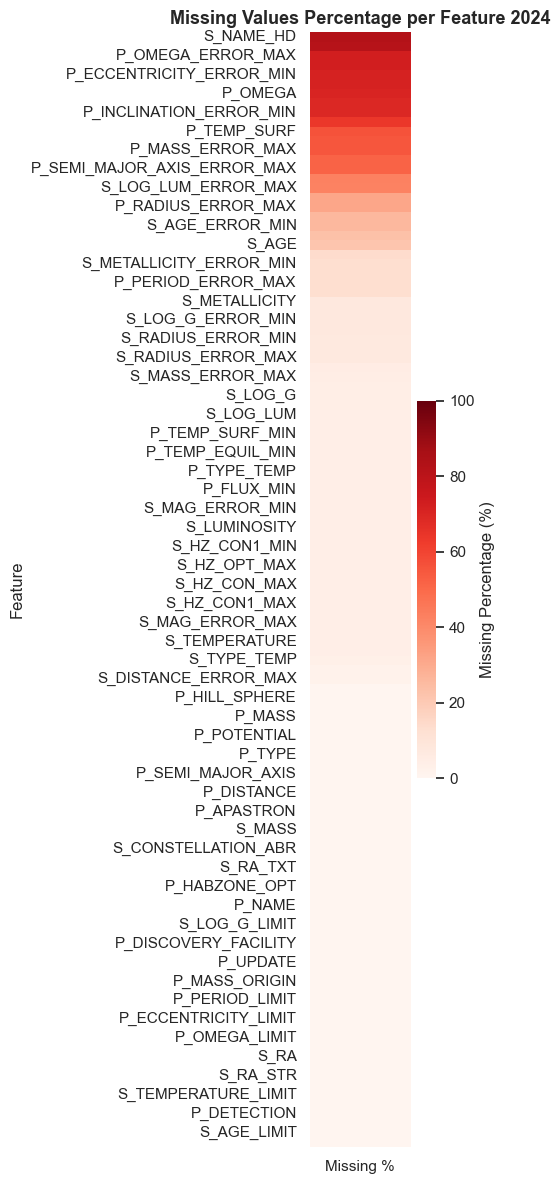

In [22]:
# missing_pct is a Series: feature -> missing %
missing_pct_df = before_df.to_frame(name="Missing %")

plt.figure(figsize=(5,12))

ax = sns.heatmap(
    missing_pct_df,
    cmap="Reds",
    vmin=0,
    vmax=100,
    cbar=True,
    cbar_kws={
        "label": "Missing Percentage (%)",
        "shrink": 0.8
    }
)

ax.set_title("Missing Values Percentage per Feature 2024", fontsize=13, weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Feature")

plt.tight_layout()
plt.show()


In [23]:
#Huge update in missing values compared to 2019 dataset
#Planning to use this dataset for further analysis

In [24]:
drop_cols = [
    "S_NAME_HD",
    "S_NAME_HIP",
    "P_NAME",
    "S_NAME",
    "P_OMEGA",
    "P_INCLINATION",
    "S_TYPE"
]

error_cols = [col for col in hwc_df.columns if "ERROR" in col]

drop_cols = list(set(drop_cols + error_cols))


for col,i in enumerate(drop_cols, 1):
    print(f'{col}. {(i)}')


1. S_RADIUS_ERROR_MAX
2. P_PERIOD_ERROR_MIN
3. P_ECCENTRICITY_ERROR_MIN
4. S_MASS_ERROR_MAX
5. P_MASS_ERROR_MIN
6. S_TEMPERATURE_ERROR_MIN
7. P_OMEGA_ERROR_MIN
8. S_NAME
9. S_MAG_ERROR_MAX
10. S_DISTANCE_ERROR_MAX
11. P_INCLINATION_ERROR_MAX
12. S_LOG_LUM_ERROR_MAX
13. S_METALLICITY_ERROR_MIN
14. S_RADIUS_ERROR_MIN
15. P_PERIOD_ERROR_MAX
16. P_INCLINATION_ERROR_MIN
17. S_DISTANCE_ERROR_MIN
18. S_LOG_G_ERROR_MIN
19. S_METALLICITY_ERROR_MAX
20. S_AGE_ERROR_MAX
21. S_MAG_ERROR_MIN
22. P_OMEGA_ERROR_MAX
23. P_SEMI_MAJOR_AXIS_ERROR_MAX
24. S_AGE_ERROR_MIN
25. S_NAME_HD
26. P_RADIUS_ERROR_MAX
27. S_TEMPERATURE_ERROR_MAX
28. S_TYPE
29. S_LOG_LUM_ERROR_MIN
30. P_INCLINATION
31. S_MASS_ERROR_MIN
32. P_RADIUS_ERROR_MIN
33. P_OMEGA
34. P_MASS_ERROR_MAX
35. P_NAME
36. P_SEMI_MAJOR_AXIS_ERROR_MIN
37. S_NAME_HIP
38. P_ECCENTRICITY_ERROR_MAX
39. S_LOG_G_ERROR_MAX


In [25]:
hwc_df.shape

(5599, 118)

In [26]:
hwc_df = hwc_df.drop(columns=drop_cols)
hwc_df.shape

(5599, 79)

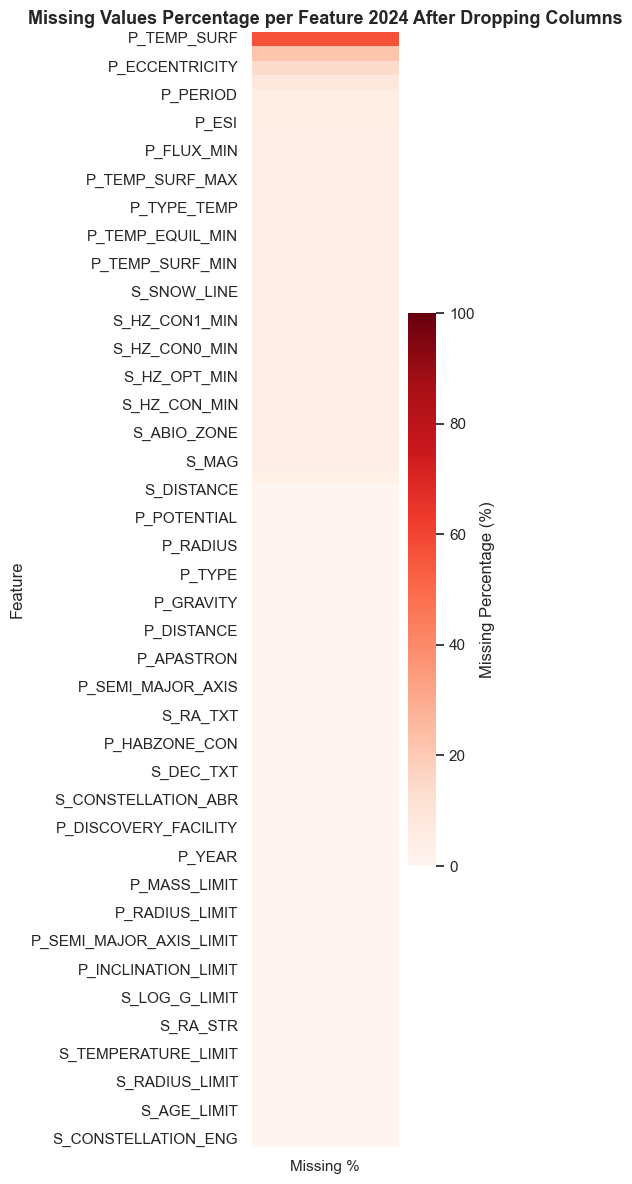

In [27]:
after_df = (hwc_df.isnull().mean() * 100).sort_values(ascending=False)
missing_pct_df = after_df.to_frame(name="Missing %")

plt.figure(figsize=(5,12))

ax = sns.heatmap(
    missing_pct_df,
    cmap="Reds",
    vmin=0,
    vmax=100,
    cbar=True,
    cbar_kws={
        "label": "Missing Percentage (%)",
        "shrink": 0.8
    }
)

ax.set_title("Missing Values Percentage per Feature 2024 After Dropping Columns", fontsize=13, weight="bold")
ax.set_xlabel("")
ax.set_ylabel("Feature")

plt.tight_layout()
plt.show()

In [28]:
for col, pct in enumerate(after_df.items(), 1):
    print(f"{col}. {pct[0]}: {pct[1]:.2f}% missing")

1. P_TEMP_SURF: 56.40% missing
2. S_AGE: 21.56% missing
3. P_ECCENTRICITY: 13.88% missing
4. S_METALLICITY: 7.73% missing
5. P_PERIOD: 4.45% missing
6. S_LOG_G: 4.39% missing
7. P_ESI: 4.30% missing
8. S_LOG_LUM: 4.20% missing
9. P_FLUX_MIN: 4.18% missing
10. P_FLUX: 4.18% missing
11. P_TEMP_SURF_MAX: 4.18% missing
12. P_FLUX_MAX: 4.18% missing
13. P_TYPE_TEMP: 4.18% missing
14. P_TEMP_EQUIL: 4.18% missing
15. P_TEMP_EQUIL_MIN: 4.18% missing
16. P_TEMP_EQUIL_MAX: 4.18% missing
17. P_TEMP_SURF_MIN: 4.18% missing
18. S_HZ_OPT_MAX: 4.16% missing
19. S_SNOW_LINE: 4.16% missing
20. S_HZ_CON1_MAX: 4.16% missing
21. S_HZ_CON1_MIN: 4.16% missing
22. S_HZ_CON0_MAX: 4.16% missing
23. S_HZ_CON0_MIN: 4.16% missing
24. S_LUMINOSITY: 4.16% missing
25. S_HZ_OPT_MIN: 4.16% missing
26. S_HZ_CON_MAX: 4.16% missing
27. S_HZ_CON_MIN: 4.16% missing
28. S_RADIUS: 4.14% missing
29. S_ABIO_ZONE: 3.98% missing
30. S_TEMPERATURE: 3.91% missing
31. S_MAG: 3.91% missing
32. S_TYPE_TEMP: 3.46% missing
33. S_DISTAN

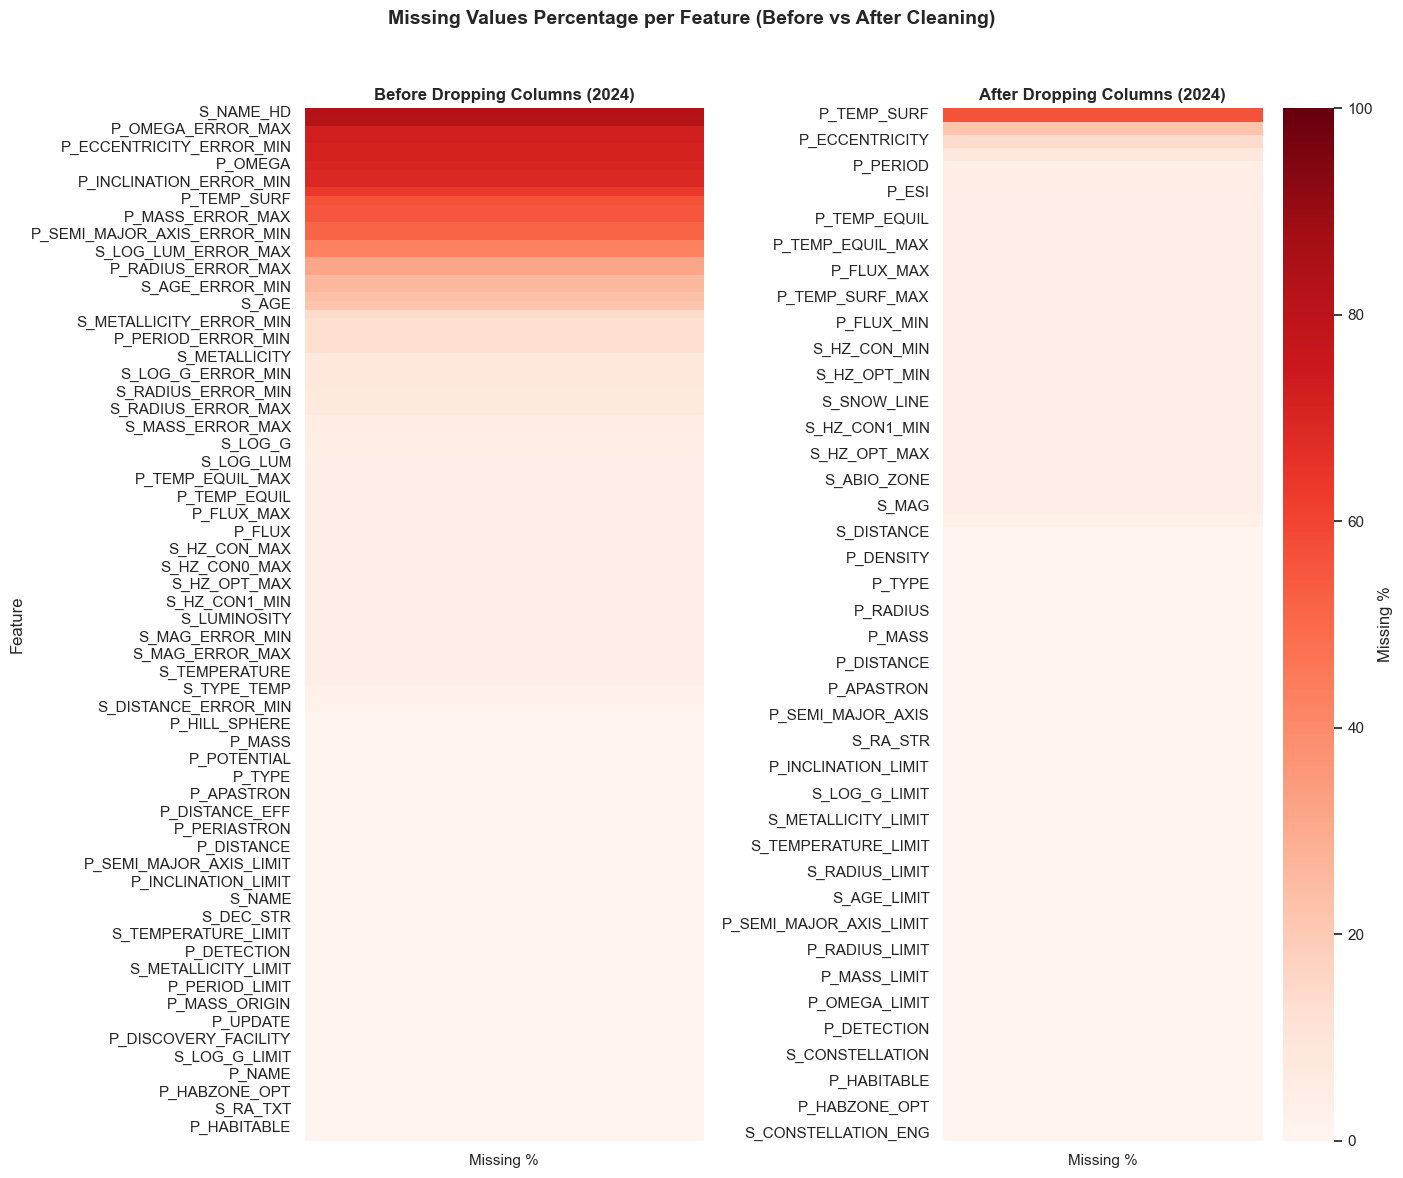

In [29]:
before_df = before_df.to_frame(name="Missing %")
after_df  = after_df.to_frame(name="Missing %")
# Sort by missing percentage
before_df = before_df.sort_values("Missing %", ascending=False)
after_df  = after_df.sort_values("Missing %", ascending=False)

fig, axes = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 12),
    sharey=False
)

# ---- BEFORE ----
sns.heatmap(
    before_df,
    cmap="Reds",
    vmin=0, vmax=100,
    cbar=False,
    ax=axes[0]
)
axes[0].set_title("Before Dropping Columns (2024)", fontsize=12, weight="bold")
axes[0].set_xlabel("")
axes[0].set_ylabel("Feature")

# ---- AFTER ----
sns.heatmap(
    after_df,
    cmap="Reds",
    vmin=0, vmax=100,
    cbar=True,
    cbar_kws={"label": "Missing %"},
    ax=axes[1]
)
axes[1].set_title("After Dropping Columns (2024)", fontsize=12, weight="bold")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.suptitle(
    "Missing Values Percentage per Feature (Before vs After Cleaning)",
    fontsize=14,
    weight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [30]:
target_col = "P_HABITABLE"

X = hwc_df.drop(columns=[target_col])
y = hwc_df[target_col]

In [31]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numerical columns: 64
Categorical columns: 14


In [32]:
# Split the data uisinfng stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
#verifying distribution
print("Overall distribution:")
print(y.value_counts(normalize=True))

print("\nTrain distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))


Overall distribution:
P_HABITABLE
0    0.987498
2    0.007323
1    0.005179
Name: proportion, dtype: float64

Train distribution:
P_HABITABLE
0    0.987497
2    0.007368
1    0.005135
Name: proportion, dtype: float64

Test distribution:
P_HABITABLE
0    0.987500
2    0.007143
1    0.005357
Name: proportion, dtype: float64


In [34]:
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print(f"Numerical cols: {len(numerical_cols)}")
print(f"Categorical cols: {len(categorical_cols)}")


Numerical cols: 64
Categorical cols: 14


In [35]:
num_imputer = SimpleImputer(strategy="median")

X_train_num = pd.DataFrame(
    num_imputer.fit_transform(X_train[numerical_cols]),
    columns=numerical_cols,
    index=X_train.index
)
X_train_num.isnull().sum()

P_YEAR            0
P_MASS            0
P_MASS_LIMIT      0
P_RADIUS          0
P_RADIUS_LIMIT    0
                 ..
S_ABIO_ZONE       0
S_TIDAL_LOCK      0
P_HABZONE_OPT     0
P_HABZONE_CON     0
P_ESI             0
Length: 64, dtype: int64

In [36]:
X_test_num = pd.DataFrame(
    num_imputer.transform(X_test[numerical_cols]),
    columns=numerical_cols,
    index=X_test.index
)
X_test_num.isnull().sum()

P_YEAR            0
P_MASS            0
P_MASS_LIMIT      0
P_RADIUS          0
P_RADIUS_LIMIT    0
                 ..
S_ABIO_ZONE       0
S_TIDAL_LOCK      0
P_HABZONE_OPT     0
P_HABZONE_CON     0
P_ESI             0
Length: 64, dtype: int64

In [37]:
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train_cat = pd.DataFrame(
    cat_imputer.fit_transform(X_train[categorical_cols]),
    columns=categorical_cols,
    index=X_train.index
)
X_train_cat.isnull().sum()

P_DETECTION             0
P_DISCOVERY_FACILITY    0
P_UPDATE                0
P_MASS_ORIGIN           0
S_RA_STR                0
S_DEC_STR               0
P_TYPE                  0
S_TYPE_TEMP             0
S_RA_TXT                0
S_DEC_TXT               0
P_TYPE_TEMP             0
S_CONSTELLATION         0
S_CONSTELLATION_ABR     0
S_CONSTELLATION_ENG     0
dtype: int64

In [38]:
X_test_cat = pd.DataFrame(
    cat_imputer.transform(X_test[categorical_cols]),
    columns=categorical_cols,
    index=X_test.index
)
X_test_cat.isnull().sum()

P_DETECTION             0
P_DISCOVERY_FACILITY    0
P_UPDATE                0
P_MASS_ORIGIN           0
S_RA_STR                0
S_DEC_STR               0
P_TYPE                  0
S_TYPE_TEMP             0
S_RA_TXT                0
S_DEC_TXT               0
P_TYPE_TEMP             0
S_CONSTELLATION         0
S_CONSTELLATION_ABR     0
S_CONSTELLATION_ENG     0
dtype: int64

In [39]:
X_train_imputed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_imputed  = pd.concat([X_test_num, X_test_cat], axis=1)
X_train_imputed.shape, X_test_imputed.shape

((4479, 78), (1120, 78))

In [40]:
print("Train missing:", X_train_imputed.isnull().sum().sum())
print("Test missing:", X_test_imputed.isnull().sum().sum())


Train missing: 0
Test missing: 0


In [41]:
y.isnull().sum()


0

In [42]:
numerical_cols = X_train_imputed.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train_imputed.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numerical:", len(numerical_cols))
print("Categorical:", len(categorical_cols))


Numerical: 64
Categorical: 14


In [43]:
X_train_imputed[categorical_cols].head()

,P_DETECTION,P_DISCOVERY_FACILITY,P_UPDATE,P_MASS_ORIGIN,S_RA_STR,S_DEC_STR,P_TYPE,S_TYPE_TEMP,S_RA_TXT,S_DEC_TXT,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
2480,Transit,Kepler,2019-04-16,M-R relationship,19h29m55.13s,+38d30m53.65s,Neptunian,F,19 29 55.13,+38 30 53.65,Hot,Cygnus,Cyg,Swan
1017,Radial Velocity,Anglo-Australian Telescope,2014-05-14,Msini,11h46m28.99s,-40d29m55.04s,Neptunian,G,11 46 28.99,-40 29 55.04,Hot,Centaurus,Cen,Centaur
920,Radial Velocity,W. M. Keck Observatory,2018-12-03,Msini,02h23m14.04s,+10d50m12.47s,Jovian,G,02 23 14.04,+10 50 12.47,Hot,Aries,Ari,Ram
4307,Radial Velocity,La Silla Observatory,2019-10-18,Mass,22h03m29.14s,-56d47m48.85s,Jovian,K,22 03 29.14,-56 47 48.85,Cold,Indus,Ind,Indian
272,Transit,KELT,2024-03-04,Mass,06h10m39.37s,+30d57m25.68s,Jovian,F,06 10 39.37,+30 57 25.68,Hot,Auriga,Aur,Charioteer


In [44]:
drop_cols = [
    "S_RA_STR", "S_RA_TXT",
    "S_DEC_STR", "S_DEC_TXT",
    "P_UPDATE"
]
X_train_imputed = X_train_imputed.drop(columns=drop_cols)
X_test_imputed  = X_test_imputed.drop(columns=drop_cols)

In [45]:
X_train_imputed.shape, X_test_imputed.shape

((4479, 73), (1120, 73))

In [46]:
X_train_imputed.head()

,P_YEAR,P_MASS,P_MASS_LIMIT,P_RADIUS,P_RADIUS_LIMIT,P_PERIOD,P_PERIOD_LIMIT,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_LIMIT,P_ECCENTRICITY,...,P_ESI,P_DETECTION,P_DISCOVERY_FACILITY,P_MASS_ORIGIN,P_TYPE,S_TYPE_TEMP,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
2480,2014.0,11.40000,0.0,3.380,0.0,16.088134,0.0,0.13200,0.0,0.000,...,0.202887,Transit,Kepler,M-R relationship,Neptunian,F,Hot,Cygnus,Cyg,Swan
1017,2010.0,16.00000,0.0,4.140,0.0,122.100000,0.0,0.46000,0.0,0.340,...,0.379418,Radial Velocity,Anglo-Australian Telescope,Msini,Neptunian,G,Hot,Centaurus,Cen,Centaur
920,2018.0,356.28743,0.0,13.700,0.0,676.600000,0.0,1.70000,0.0,0.155,...,0.239496,Radial Velocity,W. M. Keck Observatory,Msini,Jovian,G,Hot,Aries,Ari,Ram
4307,2019.0,1032.94750,0.0,13.100,0.0,16510.000000,0.0,11.55000,0.0,0.260,...,0.070203,Radial Velocity,La Silla Observatory,Mass,Jovian,K,Cold,Indus,Ind,Indian
272,2012.0,540.31100,0.0,15.132,0.0,4.113790,0.0,0.05497,0.0,0.000,...,0.060600,Transit,KELT,Mass,Jovian,F,Hot,Auriga,Aur,Charioteer


In [47]:
X_test_imputed.head()

,P_YEAR,P_MASS,P_MASS_LIMIT,P_RADIUS,P_RADIUS_LIMIT,P_PERIOD,P_PERIOD_LIMIT,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_LIMIT,P_ECCENTRICITY,...,P_ESI,P_DETECTION,P_DISCOVERY_FACILITY,P_MASS_ORIGIN,P_TYPE,S_TYPE_TEMP,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
5198,2019.0,2.83000,0.0,1.49,0.0,4.528598,0.0,0.050533,0.0,0.0,...,0.289732,Transit,K2,M-R relationship,Terran,K,Hot,Cancer,Cnc,Crab
2000,2016.0,6.71000,0.0,2.48,0.0,12.109710,0.0,0.101900,0.0,0.0,...,0.235287,Transit,Kepler,M-R relationship,Superterran,F,Hot,Cygnus,Cyg,Swan
4236,2014.0,7.61000,0.0,2.67,0.0,11.979010,0.0,0.097000,0.0,0.0,...,0.248823,Transit,Kepler,M-R relationship,Neptunian,K,Hot,Cygnus,Cyg,Swan
5269,2021.0,667.43965,0.0,13.40,0.0,3.294601,0.0,0.049147,0.0,0.0,...,0.067328,Orbital Brightness Modulation,Kepler,Msini,Jovian,G,Hot,Cygnus,Cyg,Swan
1545,2016.0,0.77900,0.0,0.94,0.0,5.495486,0.0,0.061400,0.0,0.0,...,0.294809,Transit,Kepler,M-R relationship,Terran,G,Hot,Lyra,Lyr,Lyre


In [48]:
numerical_cols = X_train_imputed.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train_imputed.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numerical:", len(numerical_cols))
print("Categorical:", len(categorical_cols))

Numerical: 64
Categorical: 9


In [49]:
X_train_imputed[categorical_cols].head()

,P_DETECTION,P_DISCOVERY_FACILITY,P_MASS_ORIGIN,P_TYPE,S_TYPE_TEMP,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
2480,Transit,Kepler,M-R relationship,Neptunian,F,Hot,Cygnus,Cyg,Swan
1017,Radial Velocity,Anglo-Australian Telescope,Msini,Neptunian,G,Hot,Centaurus,Cen,Centaur
920,Radial Velocity,W. M. Keck Observatory,Msini,Jovian,G,Hot,Aries,Ari,Ram
4307,Radial Velocity,La Silla Observatory,Mass,Jovian,K,Cold,Indus,Ind,Indian
272,Transit,KELT,Mass,Jovian,F,Hot,Auriga,Aur,Charioteer


In [50]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 1000)
pd.set_option("display.max_colwidth", None)
X_train_imputed[numerical_cols].head()

,P_YEAR,P_MASS,P_MASS_LIMIT,P_RADIUS,P_RADIUS_LIMIT,P_PERIOD,P_PERIOD_LIMIT,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_LIMIT,P_ECCENTRICITY,P_ECCENTRICITY_LIMIT,P_INCLINATION_LIMIT,P_OMEGA_LIMIT,S_RA,S_DEC,S_MAG,S_DISTANCE,S_TEMPERATURE,S_TEMPERATURE_LIMIT,S_MASS,S_MASS_LIMIT,S_RADIUS,S_RADIUS_LIMIT,S_METALLICITY,S_METALLICITY_LIMIT,S_AGE,S_AGE_LIMIT,S_LOG_LUM,S_LOG_LUM_LIMIT,S_LOG_G,S_LOG_G_LIMIT,P_ESCAPE,P_POTENTIAL,P_GRAVITY,P_DENSITY,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,P_TEMP_SURF,P_TEMP_SURF_MIN,P_TEMP_SURF_MAX,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_ESI
2480,2014.0,11.40000,0.0,3.380,0.0,16.088134,0.0,0.13200,0.0,0.000,0.0,0.0,0.0,292.479700,38.514902,15.289,2034.25000,6165.0,0.0,1.16,0.0,1.38,0.0,0.000,0.0,0.31,0.0,0.449,0.0,4.23,0.0,1.836513,3.372781,0.997864,0.295226,0.002828,0.132000,0.13200,0.13200,0.132000,161.380900,161.380900,161.380900,907.951700,907.951700,907.951700,909.92775,1025.388800,1025.388800,2.811901,1.229158,2.869880,1.556865,2.720908,1.645760,2.720908,1.502763,2.720908,4.527555,4.144294,0.309223,0.0,0.0,0.202887
1017,2010.0,16.00000,0.0,4.140,0.0,122.100000,0.0,0.46000,0.0,0.340,0.0,0.0,0.0,176.620800,-40.498621,4.890,9.28940,5630.0,0.0,0.85,0.0,0.95,0.0,-0.260,0.0,9.00,0.0,-0.057,0.0,4.57,0.0,1.965893,3.864734,0.933511,0.225486,0.008078,0.486588,0.30360,0.61640,0.466914,4.407172,2.308207,9.514730,360.770780,313.991860,447.402930,909.92775,354.604470,505.271310,0.877001,0.709015,1.677318,0.898059,1.590250,0.949776,1.590250,0.866922,1.590250,2.528505,1.490268,0.488733,0.0,0.0,0.379418
920,2018.0,356.28743,0.0,13.700,0.0,676.600000,0.0,1.70000,0.0,0.155,0.0,0.0,0.0,35.808510,10.836797,7.630,119.13700,4946.0,0.0,1.43,0.0,5.01,0.0,0.000,0.0,3.98,0.0,1.115,0.0,3.23,0.0,5.099645,26.006382,1.898276,0.138560,0.090416,1.720421,1.43650,1.96350,1.705146,4.564391,3.380167,6.315224,370.654200,345.409480,403.828430,909.92775,390.085730,456.060760,13.031668,2.834746,6.868614,3.590628,6.512061,3.800128,6.512061,3.466364,6.512061,9.746838,0.547300,0.519752,0.0,0.0,0.239496
4307,2019.0,1032.94750,0.0,13.100,0.0,16510.000000,0.0,11.55000,0.0,0.260,0.0,0.0,0.0,330.871400,-56.796902,4.690,3.63857,4754.0,0.0,0.75,0.0,0.78,0.0,-0.134,0.0,4.70,0.0,-0.622,0.0,4.57,0.0,8.879806,78.850954,6.019157,0.459478,0.951199,11.940390,8.54700,14.55300,11.649834,0.001854,0.001127,0.003269,52.172283,46.679204,60.910597,909.92775,52.716826,68.788948,0.238781,0.386984,0.945250,0.490174,0.896181,0.518890,0.896181,0.473213,0.896181,1.319361,0.317355,0.420657,0.0,0.0,0.070203
272,2012.0,540.31100,0.0,15.132,0.0,4.113790,0.0,0.05497,0.0,0.000,0.0,0.0,0.0,92.664023,30.957133,8.680,134.05800,6327.0,0.0,1.54,0.0,1.93,0.0,0.000,0.0,3.97,0.0,0.689,0.0,4.50,0.0,5.975493,35.706516,2.359669,0.155939,0.003878,0.054970,0.05497,0.05497,0.054970,1617.143400,1617.143400,1617.143400,1615.425200,1615.425200,1615.425200,909.92775,1824.368900,1824.368900,4.886524,1.604561,3.734996,2.032345,3.541117,2.148122,3.541117,1.961669,3.541117,5.968480,6.016482,0.519833,0.0,0.0,0.060600


In [51]:
X_train_num.isnull().sum().sum()

0

In [52]:
ohe = OneHotEncoder(
    drop="first",          # avoid dummy variable trap
    sparse_output=False,   # easier to work with DataFrames
    handle_unknown="ignore"
)
X_train_imputed[categorical_cols].head()

,P_DETECTION,P_DISCOVERY_FACILITY,P_MASS_ORIGIN,P_TYPE,S_TYPE_TEMP,P_TYPE_TEMP,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
2480,Transit,Kepler,M-R relationship,Neptunian,F,Hot,Cygnus,Cyg,Swan
1017,Radial Velocity,Anglo-Australian Telescope,Msini,Neptunian,G,Hot,Centaurus,Cen,Centaur
920,Radial Velocity,W. M. Keck Observatory,Msini,Jovian,G,Hot,Aries,Ari,Ram
4307,Radial Velocity,La Silla Observatory,Mass,Jovian,K,Cold,Indus,Ind,Indian
272,Transit,KELT,Mass,Jovian,F,Hot,Auriga,Aur,Charioteer


In [53]:
for col in categorical_cols:
    print(f"\n=== {col} ===")
    print(X_train_imputed[col].value_counts())



=== P_DETECTION ===
P_DETECTION
Transit                          3337
Radial Velocity                   862
Microlensing                      177
Imaging                            51
Transit Timing Variations          24
Eclipse Timing Variations          10
Orbital Brightness Modulation       7
Pulsar Timing                       5
Astrometry                          3
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: count, dtype: int64

=== P_DISCOVERY_FACILITY ===
P_DISCOVERY_FACILITY
Kepler                                                          2213
K2                                                               433
Transiting Exoplanet Survey Satellite (TESS)                     351
Multiple Observatories                                           240
La Silla Observatory                                             220
W. M. Keck Observatory                                           144
SuperWASP                                                 

In [54]:
X_train_cat_encoded = pd.DataFrame(
    ohe.fit_transform(X_train_imputed[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X_train_imputed.index
)


In [55]:
X_train_cat_encoded.head()

,P_DETECTION_Disk Kinematics,P_DETECTION_Eclipse Timing Variations,P_DETECTION_Imaging,P_DETECTION_Microlensing,P_DETECTION_Orbital Brightness Modulation,P_DETECTION_Pulsar Timing,P_DETECTION_Pulsation Timing Variations,P_DETECTION_Radial Velocity,P_DETECTION_Transit,P_DETECTION_Transit Timing Variations,P_DISCOVERY_FACILITY_Anglo-Australian Telescope,P_DISCOVERY_FACILITY_Apache Point Observatory,P_DISCOVERY_FACILITY_Arecibo Observatory,P_DISCOVERY_FACILITY_Atacama Large Millimeter Array (ALMA),P_DISCOVERY_FACILITY_Bohyunsan Optical Astronomical Observatory,P_DISCOVERY_FACILITY_CHaracterising ExOPlanets Satellite (CHEOPS),P_DISCOVERY_FACILITY_Calar Alto Observatory,P_DISCOVERY_FACILITY_Cerro Tololo Inter-American Observatory,P_DISCOVERY_FACILITY_CoRoT,P_DISCOVERY_FACILITY_European Southern Observatory,P_DISCOVERY_FACILITY_European Space Agency (ESA) Gaia Satellite,P_DISCOVERY_FACILITY_Fred Lawrence Whipple Observatory,P_DISCOVERY_FACILITY_Gemini Observatory,P_DISCOVERY_FACILITY_HATNet,P_DISCOVERY_FACILITY_HATSouth,P_DISCOVERY_FACILITY_Haleakala Observatory,P_DISCOVERY_FACILITY_Haute-Provence Observatory,P_DISCOVERY_FACILITY_Hubble Space Telescope,P_DISCOVERY_FACILITY_Infrared Survey Facility,P_DISCOVERY_FACILITY_K2,P_DISCOVERY_FACILITY_KELT,P_DISCOVERY_FACILITY_KELT-North,P_DISCOVERY_FACILITY_KELT-South,P_DISCOVERY_FACILITY_KMTNet,P_DISCOVERY_FACILITY_KOINet,P_DISCOVERY_FACILITY_Kepler,P_DISCOVERY_FACILITY_Kitt Peak National Observatory,P_DISCOVERY_FACILITY_La Silla Observatory,P_DISCOVERY_FACILITY_Large Binocular Telescope Observatory,P_DISCOVERY_FACILITY_Las Campanas Observatory,P_DISCOVERY_FACILITY_Leoncito Astronomical Complex,P_DISCOVERY_FACILITY_Lick Observatory,P_DISCOVERY_FACILITY_Lowell Observatory,P_DISCOVERY_FACILITY_MEarth Project,P_DISCOVERY_FACILITY_MOA,P_DISCOVERY_FACILITY_Mauna Kea Observatory,P_DISCOVERY_FACILITY_McDonald Observatory,P_DISCOVERY_FACILITY_Multiple Facilities,P_DISCOVERY_FACILITY_Multiple Observatories,P_DISCOVERY_FACILITY_Next-Generation Transit Survey (NGTS),P_DISCOVERY_FACILITY_OGLE,P_DISCOVERY_FACILITY_Okayama Astrophysical Observatory,P_DISCOVERY_FACILITY_Palomar Observatory,P_DISCOVERY_FACILITY_Paranal Observatory,P_DISCOVERY_FACILITY_Parkes Observatory,P_DISCOVERY_FACILITY_Qatar,P_DISCOVERY_FACILITY_Roque de los Muchachos Observatory,P_DISCOVERY_FACILITY_SPECULOOS Southern Observatory,P_DISCOVERY_FACILITY_Spitzer Space Telescope,P_DISCOVERY_FACILITY_Subaru Telescope,P_DISCOVERY_FACILITY_SuperWASP,P_DISCOVERY_FACILITY_SuperWASP-North,P_DISCOVERY_FACILITY_SuperWASP-South,P_DISCOVERY_FACILITY_Teide Observatory,P_DISCOVERY_FACILITY_Thueringer Landessternwarte Tautenburg,P_DISCOVERY_FACILITY_TrES,P_DISCOVERY_FACILITY_Transiting Exoplanet Survey Satellite (TESS),P_DISCOVERY_FACILITY_United Kingdom Infrared Telescope,P_DISCOVERY_FACILITY_University of Canterbury Mt John Observatory,P_DISCOVERY_FACILITY_Very Long Baseline Array,P_DISCOVERY_FACILITY_W. M. Keck Observatory,P_DISCOVERY_FACILITY_WASP-South,P_DISCOVERY_FACILITY_Wide-field Infrared Survey Explorer (WISE) Satellite Mission,P_DISCOVERY_FACILITY_Winer Observatory,P_DISCOVERY_FACILITY_XO,P_DISCOVERY_FACILITY_Xinglong Station,P_DISCOVERY_FACILITY_Yunnan Astronomical Observatory,P_MASS_ORIGIN_Mass,P_MASS_ORIGIN_Msin(i)/sin(i),P_MASS_ORIGIN_Msini,P_TYPE_Miniterran,P_TYPE_Neptunian,P_TYPE_Subterran,P_TYPE_Superterran,P_TYPE_Terran,S_TYPE_TEMP_B,S_TYPE_TEMP_BD,S_TYPE_TEMP_F,S_TYPE_TEMP_G,S_TYPE_TEMP_K,S_TYPE_TEMP_M,S_TYPE_TEMP_PSR,S_TYPE_TEMP_WD,P_TYPE_TEMP_Hot,P_TYPE_TEMP_Warm,S_CONSTELLATION_Antlia,S_CONSTELLATION_Apus,S_CONSTELLATION_Aquarius,S_CONSTELLATION_Aquila,S_CONSTELLATION_Ara,S_CONSTELLATION_Aries,S_CONSTELLATION_Auriga,S_CONSTELLATION_Bootes,S_CONSTELLATION_Caelum,S_CONSTELLATION_Camelopardalis,S_CONSTELLATION_Cancer,S_CONSTELLATION_Canes Venatici,S_CONSTELLATION_Canis Major,S_CONSTELLATION_Canis Minor,S_CONSTELLATION_Capricornus,S_CONSTELLATION_Carina,S_CONSTELLATION_Cassiopeia,S_CONSTELLATION_Centaurus,S_CONSTELLATION_Cepheus,S_C

In [56]:
X_train_cat_encoded.shape

(4479, 353)

In [57]:
#HIgh cardinality columns can't proceed with one hot encoding
#planning to drop few features with high cardinality
#And also encode the remaining categorical features using hybrid enconding techniques(frequency encoding, one hot encoding)

In [58]:
drop_cols = ['S_CONSTELLATION',
'S_CONSTELLATION_ABR',
'S_CONSTELLATION_ENG']

X_train_imputed = X_train_imputed.drop(columns=drop_cols)
final_categorical_cols = [
    "P_DETECTION",
    "P_MASS_ORIGIN",
    "P_TYPE",
    "P_TYPE_TEMP",
    "S_TYPE_TEMP",
    "P_DISCOVERY_FACILITY"  # if still categorical before freq encoding
]


final_categorical_cols


['P_DETECTION',
 'P_MASS_ORIGIN',
 'P_TYPE',
 'P_TYPE_TEMP',
 'S_TYPE_TEMP',
 'P_DISCOVERY_FACILITY']

In [59]:
categorical_cols

['P_DETECTION',
 'P_DISCOVERY_FACILITY',
 'P_MASS_ORIGIN',
 'P_TYPE',
 'S_TYPE_TEMP',
 'P_TYPE_TEMP',
 'S_CONSTELLATION',
 'S_CONSTELLATION_ABR',
 'S_CONSTELLATION_ENG']

In [60]:
X_train_imputed[final_categorical_cols].head()

,P_DETECTION,P_MASS_ORIGIN,P_TYPE,P_TYPE_TEMP,S_TYPE_TEMP,P_DISCOVERY_FACILITY
2480,Transit,M-R relationship,Neptunian,Hot,F,Kepler
1017,Radial Velocity,Msini,Neptunian,Hot,G,Anglo-Australian Telescope
920,Radial Velocity,Msini,Jovian,Hot,G,W. M. Keck Observatory
4307,Radial Velocity,Mass,Jovian,Cold,K,La Silla Observatory
272,Transit,Mass,Jovian,Hot,F,KELT


In [61]:
X_test_imputed = X_test_imputed.drop(columns=drop_cols)

In [62]:
X_test_imputed[final_categorical_cols].head()

,P_DETECTION,P_MASS_ORIGIN,P_TYPE,P_TYPE_TEMP,S_TYPE_TEMP,P_DISCOVERY_FACILITY
5198,Transit,M-R relationship,Terran,Hot,K,K2
2000,Transit,M-R relationship,Superterran,Hot,F,Kepler
4236,Transit,M-R relationship,Neptunian,Hot,K,Kepler
5269,Orbital Brightness Modulation,Msini,Jovian,Hot,G,Kepler
1545,Transit,M-R relationship,Terran,Hot,G,Kepler


In [63]:
freq_encode_cols = [
    "P_DISCOVERY_FACILITY"
]

In [64]:
print("Frequency Encoding Candidates:\n")

for col in freq_encode_cols:
    print(f"{col}: {X_train_imputed[col].nunique()} unique values")

Frequency Encoding Candidates:

P_DISCOVERY_FACILITY: 68 unique values


In [65]:
ohe_cols = [
    "P_DETECTION",
    "P_MASS_ORIGIN",
    "P_TYPE",
    "P_TYPE_TEMP",
    "S_TYPE_TEMP"
]

In [66]:
print("One-Hot Encoding Candidates:\n")

for col in ohe_cols:
    print(f"{col}: {X_train_imputed[col].nunique()} unique values")


One-Hot Encoding Candidates:

P_DETECTION: 11 unique values
P_MASS_ORIGIN: 4 unique values
P_TYPE: 6 unique values
P_TYPE_TEMP: 3 unique values
S_TYPE_TEMP: 9 unique values


In [67]:
X_train_enc = X_train_imputed
X_test_enc  = X_test_imputed

In [68]:
X_train_enc[final_categorical_cols].head()

,P_DETECTION,P_MASS_ORIGIN,P_TYPE,P_TYPE_TEMP,S_TYPE_TEMP,P_DISCOVERY_FACILITY
2480,Transit,M-R relationship,Neptunian,Hot,F,Kepler
1017,Radial Velocity,Msini,Neptunian,Hot,G,Anglo-Australian Telescope
920,Radial Velocity,Msini,Jovian,Hot,G,W. M. Keck Observatory
4307,Radial Velocity,Mass,Jovian,Cold,K,La Silla Observatory
272,Transit,Mass,Jovian,Hot,F,KELT


In [69]:
freq_maps = {}

for col in freq_encode_cols:
    freq_maps[col] = X_train_enc[col].value_counts(normalize=True)
    
    X_train_enc[col + "_FREQ"] = X_train_enc[col].map(freq_maps[col])
    X_test_enc[col + "_FREQ"]  = X_test_enc[col].map(freq_maps[col]).fillna(0)


In [70]:
X_train_enc.drop(columns=freq_encode_cols, inplace=True)
X_test_enc.drop(columns=freq_encode_cols, inplace=True)


In [71]:
X_train_enc.shape

(4479, 70)

In [72]:
X_test_enc.shape

(1120, 70)

In [73]:
encoded_final_categorical_cols = [ "P_DISCOVERY_FACILITY_FREQ"]

In [74]:
X_train_enc[encoded_final_categorical_cols].head()

,P_DISCOVERY_FACILITY_FREQ
2480,0.494084
1017,0.006251
920,0.032150
4307,0.049118
272,0.001563


In [75]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

X_train_ohe = ohe.fit_transform(X_train_enc[ohe_cols])
X_test_ohe  = ohe.transform(X_test_enc[ohe_cols])

ohe_feature_names = ohe.get_feature_names_out(ohe_cols)

X_train_ohe = pd.DataFrame(
    X_train_ohe,
    columns=ohe_feature_names,
    index=X_train_enc.index
)

X_test_ohe = pd.DataFrame(
    X_test_ohe,
    columns=ohe_feature_names,
    index=X_test_enc.index
)


In [76]:
num_freq_cols = [
    col for col in X_train_enc.columns
    if col not in ohe_cols
]

X_train_num = X_train_enc[num_freq_cols]
X_test_num  = X_test_enc[num_freq_cols]


In [77]:
X_train_num.shape

(4479, 65)

In [78]:

X_test_num.shape

(1120, 65)

In [79]:
X_train_ohe_full = pd.concat(
    [X_train_num, X_train_ohe],
    axis=1
)

X_test_ohe_full = pd.concat(
    [X_test_num, X_test_ohe],
    axis=1
)

In [80]:
X_train_ohe_full.shape

(4479, 98)

In [81]:
X_test_ohe_full.shape

(1120, 98)

In [82]:
print(X_train_ohe_full.shape)
print(X_test_ohe_full.shape)

assert list(X_train_ohe_full.columns) == list(X_test_ohe_full.columns)


(4479, 98)
(1120, 98)


In [83]:


scaler_pca = StandardScaler()

X_train_num_scaled = scaler_pca.fit_transform(X_train_num)
X_test_num_scaled  = scaler_pca.transform(X_test_num)


In [84]:
X_train_num_scaled = pd.DataFrame(
    X_train_num_scaled,
    columns=X_train_num.columns,
    index=X_train_num.index
)

X_test_num_scaled = pd.DataFrame(
    X_test_num_scaled,
    columns=X_test_num.columns,
    index=X_test_num.index
)


In [85]:
X_train_num_scaled.shape,X_test_num_scaled.shape,X_train_num_scaled.isnull().sum().sum(), X_test_num_scaled.isnull().sum().sum()


((4479, 65), (1120, 65), 0, 0)

In [86]:
X_train_num_scaled.head()

,P_YEAR,P_MASS,P_MASS_LIMIT,P_RADIUS,P_RADIUS_LIMIT,P_PERIOD,P_PERIOD_LIMIT,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_LIMIT,P_ECCENTRICITY,P_ECCENTRICITY_LIMIT,P_INCLINATION_LIMIT,P_OMEGA_LIMIT,S_RA,S_DEC,S_MAG,S_DISTANCE,S_TEMPERATURE,S_TEMPERATURE_LIMIT,S_MASS,S_MASS_LIMIT,S_RADIUS,S_RADIUS_LIMIT,S_METALLICITY,S_METALLICITY_LIMIT,S_AGE,S_AGE_LIMIT,S_LOG_LUM,S_LOG_LUM_LIMIT,S_LOG_G,S_LOG_G_LIMIT,P_ESCAPE,P_POTENTIAL,P_GRAVITY,P_DENSITY,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,P_TEMP_SURF,P_TEMP_SURF_MIN,P_TEMP_SURF_MAX,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_ESI,P_DISCOVERY_FACILITY_FREQ
2480,-0.490059,-0.200195,-0.142946,-0.435228,0.029897,-0.023728,0.024407,-0.059363,0.014944,-0.462151,-0.211438,0.024002,0.0,0.626270,0.533697,0.862238,1.194330,0.464409,-0.014944,0.464802,0.0,-0.038937,0.0,-0.063851,0.021136,-1.445369,0.091219,0.754786,0.0,-0.345833,0.091219,-0.391356,-0.244432,-0.213117,-0.059752,-0.050531,-0.060074,-0.056331,-0.062047,-0.059574,-0.037281,-0.036338,-0.039740,0.238723,0.268842,0.178000,-0.087088,0.268842,0.178000,-0.048164,0.105610,0.087679,0.105600,0.087681,0.105062,0.087681,0.105558,0.087681,0.132435,-0.014944,-1.504874,-0.22619,-0.189332,-0.424947,1.005902
1017,-1.374684,-0.197962,-0.142946,-0.293565,0.029897,-0.022560,0.024407,-0.054982,0.014944,1.940178,-0.211438,0.024002,0.0,-0.651592,-1.668362,-2.555828,-0.622558,0.126907,-0.014944,-0.231536,0.0,-0.137032,0.0,-1.297755,0.021136,1.700556,0.091219,0.075394,0.0,0.438324,0.091219,-0.363192,-0.240545,-0.217873,-0.064465,-0.050210,-0.055350,-0.054023,-0.055653,-0.055104,-0.045929,-0.045103,-0.048102,-0.916830,-0.988548,-0.779338,-0.087088,-0.988548,-0.779338,-0.064139,-0.147756,-0.146866,-0.147755,-0.146866,-0.147723,-0.146866,-0.147749,-0.146866,-0.149885,-0.014944,0.807887,-0.22619,-0.189332,0.943648,-1.164002
920,0.394566,-0.032741,-0.142946,1.488407,0.029897,-0.016450,0.024407,-0.038419,0.014944,0.633029,-0.211438,0.024002,0.0,-2.204677,-0.237675,-1.655212,-0.523998,-0.304591,-0.014944,1.071291,0.0,0.789165,0.0,-0.063851,0.021136,-0.116768,0.091219,1.649005,0.0,-2.652178,0.091219,0.318967,-0.065618,-0.146577,-0.070341,-0.045179,-0.038913,-0.038783,-0.037873,-0.038576,-0.045920,-0.045043,-0.048278,-0.895958,-0.922038,-0.869916,-0.087088,-0.922038,-0.869916,0.036216,0.887704,0.874126,0.887716,0.874131,0.887538,0.874131,0.887822,0.874131,0.869539,-0.014944,1.207534,-0.22619,-0.189332,-0.141129,-1.048804
4307,0.615722,0.295799,-0.142946,1.376568,0.029897,0.158010,0.024407,0.093153,0.014944,1.374924,-0.211438,0.024002,0.0,1.049710,-2.122585,-2.621566,-0.627628,-0.425713,-0.014944,-0.456161,0.0,-0.175813,0.0,-0.699786,0.021136,0.143884,0.091219,-0.683215,0.0,0.438324,0.091219,1.141837,0.351871,0.157954,-0.048649,0.007422,0.097235,0.056870,0.128296,0.094165,-0.046172,-0.045230,-0.048625,-1.568538,-1.554439,-1.582735,-0.087088,-1.554439,-1.582735,-0.069409,-0.304620,-0.290845,-0.304614,-0.290846,-0.304223,-0.290846,-0.304596,-0.290846,-0.320649,-0.014944,-0.069182,-0.22619,-0.189332,-1.453607,-0.973329
272,-0.932372,0.056608,-0.142946,1.755330,0.029897,-0.023860,0.024407,-0.060392,0.014944,-0.462151,-0.211438,0.024002,0.0,-1.577591,0.323066,-1.310086,-0.510610,0.566606,-0.014944,1.318379,0.0,0.086533,0.0,-0.063851,0.021136,-0.120388,0.091219,1.077027,0.0,0.276880,0.091219,0.509623,0.011016,-0.112480,-0.069166,-0.050467,-0.061100,-0.057367,-0.063064,-0.060602,0.042922,0.043866,0.040414,1.732787,1.766537,1.648618,-0.087088,1.766537,1.648618,-0.031035,0.288472,0.257825,0.288453,0.257828,0.287522,0.257828,0.288378,0.257828,0.335932,-0.014944,1.208567,-0.22619,-0.189332,-1.528059,-1.184857


In [87]:
X_train_ohe_scaled = pd.concat(
    [X_train_num_scaled, X_train_ohe],
    axis=1
)

X_test_ohe_scaled = pd.concat(
    [X_test_num_scaled, X_test_ohe],
    axis=1
)


In [88]:
X_train_ohe_scaled.shape,X_test_ohe_scaled.shape

((4479, 98), (1120, 98))

In [89]:
assert list(X_train_ohe_scaled.columns) == list(X_test_ohe_scaled.columns)

In [90]:
X_train_ohe_final = X_train_ohe_scaled.copy()
X_test_ohe_final  = X_test_ohe_scaled.copy()

In [91]:
X_train_ohe_final.shape,X_test_ohe_final.shape

((4479, 98), (1120, 98))

In [92]:
X_train_pca_final = X_train_num_scaled.copy()
X_test_pca_final  = X_test_num_scaled.copy()

In [93]:
X_train_pca_final.shape,X_test_pca_final.shape

((4479, 65), (1120, 65))

In [94]:
#final checks before pca
X_train_pca_final.isnull().sum().sum(), X_test_pca_final.isnull().sum().sum()


(0, 0)

In [95]:
X_train_pca_final.dtypes.value_counts()


float64    65
Name: count, dtype: int64

In [96]:
(X_train_pca_final.std() == 0).sum()


4

In [97]:
X_train_pca_final.describe().loc[["mean", "std"]]


,P_YEAR,P_MASS,P_MASS_LIMIT,P_RADIUS,P_RADIUS_LIMIT,P_PERIOD,P_PERIOD_LIMIT,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_LIMIT,P_ECCENTRICITY,P_ECCENTRICITY_LIMIT,P_INCLINATION_LIMIT,P_OMEGA_LIMIT,S_RA,S_DEC,S_MAG,S_DISTANCE,S_TEMPERATURE,S_TEMPERATURE_LIMIT,S_MASS,S_MASS_LIMIT,S_RADIUS,S_RADIUS_LIMIT,S_METALLICITY,S_METALLICITY_LIMIT,S_AGE,S_AGE_LIMIT,S_LOG_LUM,S_LOG_LUM_LIMIT,S_LOG_G,S_LOG_G_LIMIT,P_ESCAPE,P_POTENTIAL,P_GRAVITY,P_DENSITY,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,P_TEMP_SURF,P_TEMP_SURF_MIN,P_TEMP_SURF_MAX,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_ESI,P_DISCOVERY_FACILITY_FREQ
mean,-4.630664e-15,2.379580e-17,-1.586387e-18,1.007356e-16,4.759161e-18,1.586387e-18,7.931935e-19,-1.110471e-17,-1.586387e-18,-4.957459e-17,-1.348429e-17,-1.189790e-17,0.0,2.744450e-16,-4.838480e-17,4.957459e-16,-1.031152e-17,9.676961e-17,-4.759161e-18,-4.997119e-17,0.0,2.300261e-17,0.0,-1.110471e-17,-3.172774e-18,-7.456019e-17,2.726603e-17,-9.518322e-18,0.0,6.266229e-17,2.726603e-17,-3.172774e-17,2.062303e-17,-7.218061e-17,-4.759161e-18,6.345548e-18,3.172774e-18,9.518322e-18,9.518322e-18,-1.586387e-18,2.379580e-18,-1.586387e-18,1.586387e-18,1.052964e-16,-1.388089e-18,-3.099404e-16,2.680994e-16,4.878140e-17,2.470798e-16,7.931935e-18,-6.583506e-17,2.220942e-17,3.965967e-18,-3.807329e-17,-9.518322e-18,-3.807329e-17,-3.252093e-17,-3.807329e-17,-6.662825e-17,-7.931935e-18,-6.155182e-16,-2.220942e-17,3.965967e-17,-1.768822e-16,-1.221518e-16
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,0.0,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,0.0,1.000112e+00,0.0,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,0.0,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00


In [98]:
zero_var_cols = X_train_pca_final.columns[
    X_train_pca_final.std() == 0
]

zero_var_cols


Index(['P_OMEGA_LIMIT', 'S_MASS_LIMIT', 'S_RADIUS_LIMIT', 'S_LOG_LUM_LIMIT'], dtype='object')

In [99]:
X_train_pca_final[['P_OMEGA_LIMIT', 'S_MASS_LIMIT', 'S_RADIUS_LIMIT', 'S_LOG_LUM_LIMIT']].nunique()


P_OMEGA_LIMIT      1
S_MASS_LIMIT       1
S_RADIUS_LIMIT     1
S_LOG_LUM_LIMIT    1
dtype: int64

In [100]:
X_train_pca_final = X_train_pca_final.drop(columns=zero_var_cols)
X_test_pca_final  = X_test_pca_final.drop(columns=zero_var_cols)


In [101]:
(X_train_pca_final.std() == 0).sum()


0

In [102]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_pca_final)
X_test_pca  = pca.transform(X_test_pca_final)


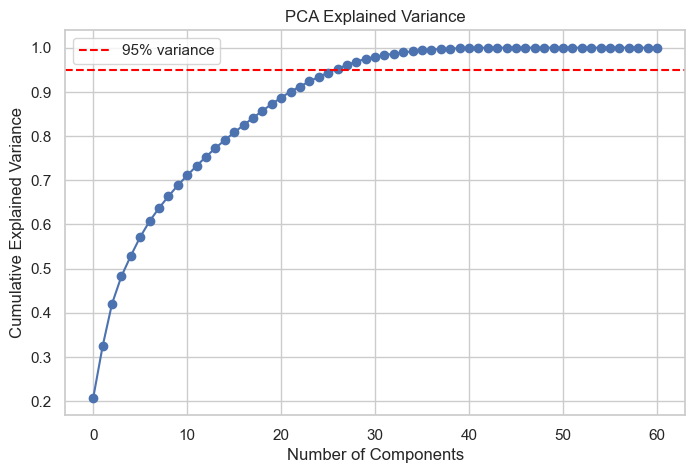

In [103]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(
    np.cumsum(pca.explained_variance_ratio_),
    marker="o"
)
plt.axhline(0.95, color="red", linestyle="--", label="95% variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.legend()
plt.grid(True)
plt.show()


In [104]:
pca_95 = PCA(n_components=0.95)
X_train_pca_95 = pca_95.fit_transform(X_train_pca_final)
X_test_pca_95  = pca_95.transform(X_test_pca_final)

X_train_pca_95.shape, X_test_pca_95.shape


((4479, 27), (1120, 27))

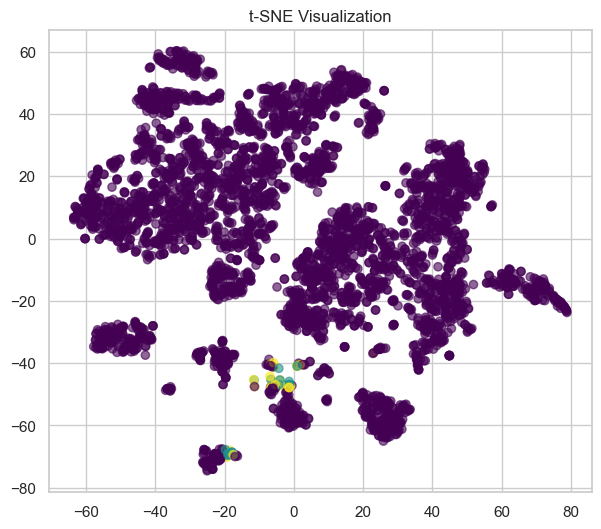

In [105]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42
)

X_tsne = tsne.fit_transform(X_train_pca_95)

plt.figure(figsize=(7,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_train, cmap="viridis", alpha=0.6)
plt.title("t-SNE Visualization")
plt.show()


In [106]:
y_train.value_counts(normalize=True)


P_HABITABLE
0    0.987497
2    0.007368
1    0.005135
Name: proportion, dtype: float64

In [107]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_pca_smote, y_train_smote = smote.fit_resample(
    X_train_pca,
    y_train
)


In [108]:
X_train_pca_95.shape

(4479, 27)

In [109]:
X_train_pca_smote, y_train_smote = smote.fit_resample(
    X_train_pca_95,
    y_train
)


In [110]:
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
P_HABITABLE
0    4423
2      33
1      23
Name: count, dtype: int64

After SMOTE:
P_HABITABLE
0    4423
1    4423
2    4423
Name: count, dtype: int64


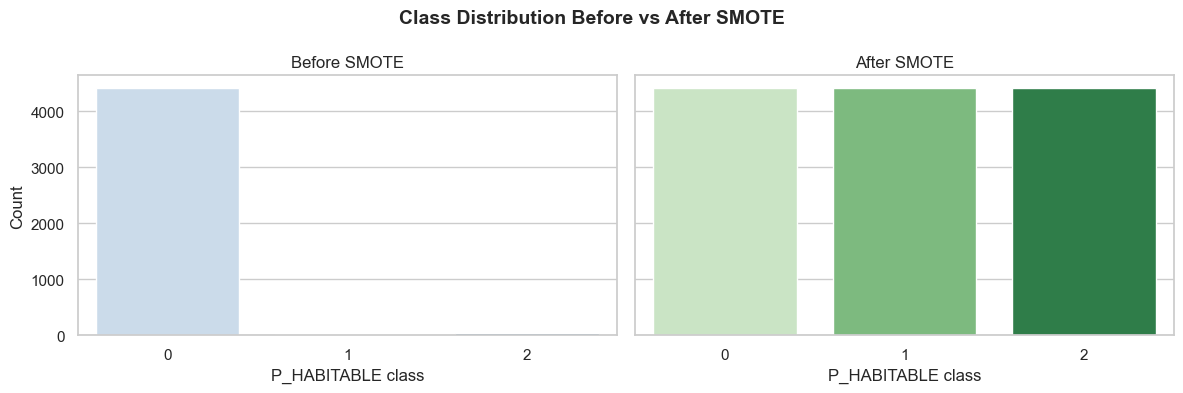

In [111]:

# Get counts
before_counts = y_train.value_counts().sort_index()
after_counts  = y_train_smote.value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# ---- BEFORE SMOTE ----
sns.barplot(
    x=before_counts.index,
    y=before_counts.values,
    ax=axes[0],
    palette="Blues"
)
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("P_HABITABLE class")
axes[0].set_ylabel("Count")

# ---- AFTER SMOTE ----
sns.barplot(
    x=after_counts.index,
    y=after_counts.values,
    ax=axes[1],
    palette="Greens"
)
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("P_HABITABLE class")

plt.suptitle("Class Distribution Before vs After SMOTE", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


In [112]:
from sklearn.svm import SVC

svm_pca = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    class_weight=None,   # SMOTE already balances
    probability=True,
    random_state=42
)


In [113]:
svm_pca.fit(X_train_pca_smote, y_train_smote)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [115]:
y_pred = svm_pca.predict(X_test_pca)
y_proba = svm_pca.predict_proba(X_test_pca)


ValueError: X has 61 features, but SVC is expecting 27 features as input.

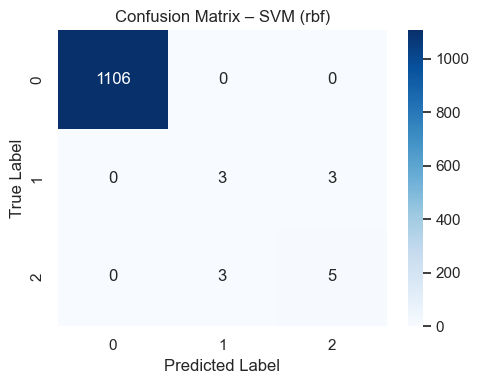

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=svm_pca.classes_,
    yticklabels=svm_pca.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – SVM (rbf)")
plt.tight_layout()
plt.show()


In [ ]:
print("Classification Report – SVM (PCA + SMOTE)\n")
print(classification_report(y_test, y_pred))


Classification Report – SVM (PCA + SMOTE)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1106
           1       0.50      0.50      0.50         6
           2       0.62      0.62      0.62         8

    accuracy                           0.99      1120
   macro avg       0.71      0.71      0.71      1120
weighted avg       0.99      0.99      0.99      1120



In [ ]:
svm_pca_results = {
    "model": "SVM (RBF)",
    "pipeline": "PCA + SMOTE",
    "confusion_matrix": cm,
    "classification_report": classification_report(
        y_test, y_pred, output_dict=True
    ),
    "roc_auc": roc_curve
}


In [116]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt


In [117]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42
)


In [118]:
xgb_model.fit(X_train_ohe_final, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [119]:
y_pred = xgb_model.predict(X_test_ohe_final)
y_proba = xgb_model.predict_proba(X_test_ohe_final)

In [120]:
y_pred = xgb_model.predict(X_test_ohe_final)
y_proba = xgb_model.predict_proba(X_test_ohe_final)

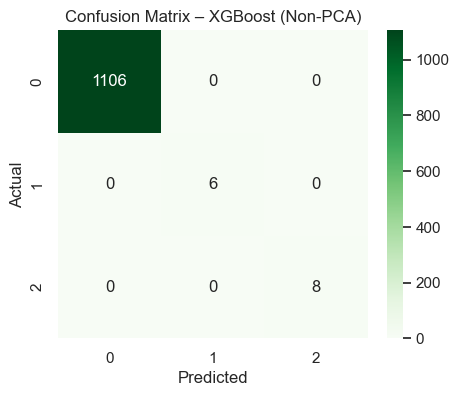

In [121]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=xgb_model.classes_,
    yticklabels=xgb_model.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost (Non-PCA)")
plt.show()


In [122]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1106
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



In [ ]:
roc_auc = roc_auc_score(
    y_test,
    y_proba,
    multi_class="ovr"
)
print("ROC-AUC:", roc_auc)



ROC-AUC: 1.0


In [124]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(
    C=1.0,
    class_weight=None,   # SMOTE already balanced
    random_state=42,
    max_iter=5000
)

linear_svm.fit(X_train_pca_final, y_train)


,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo rand

In [125]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = linear_svm.predict(X_test_pca_final)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1103    2    1]
 [   0    3    3]
 [   0    1    7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1106
           1       0.50      0.50      0.50         6
           2       0.64      0.88      0.74         8

    accuracy                           0.99      1120
   macro avg       0.71      0.79      0.75      1120
weighted avg       0.99      0.99      0.99      1120



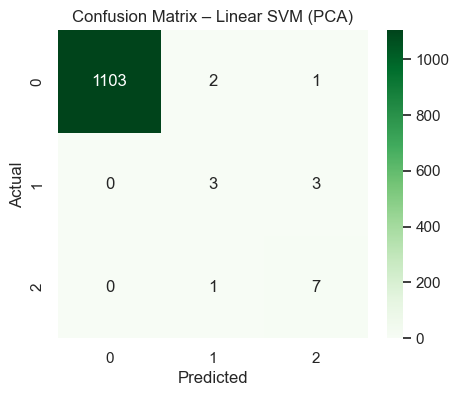

In [129]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=linear_svm.classes_,
    yticklabels=linear_svm.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Linear SVM (PCA)")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight=None  # SMOTE already balanced
)

rf.fit(X_train_rf_smote, y_train_smote)
